In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds

In [3]:
plt.rc('font', size=12)

In [4]:
MP134 = get_results("MP134")
MP325 = get_results("MP325")
MP326 = get_results("MP326")
MP327 = get_results("MP327")
MP328 = get_results("MP328")

In [5]:
for exp in [
    MP134,
    MP325,
    MP326,
    MP327,
    MP328,
]:
    print(f'Exp: {exp.name} - Training Steps: {exp.dynamics.model_loss_history.shape[0]}')

Exp: MP134 - Training Steps: 588
Exp: MP325 - Training Steps: 256
Exp: MP326 - Training Steps: 576
Exp: MP327 - Training Steps: 608
Exp: MP328 - Training Steps: 576


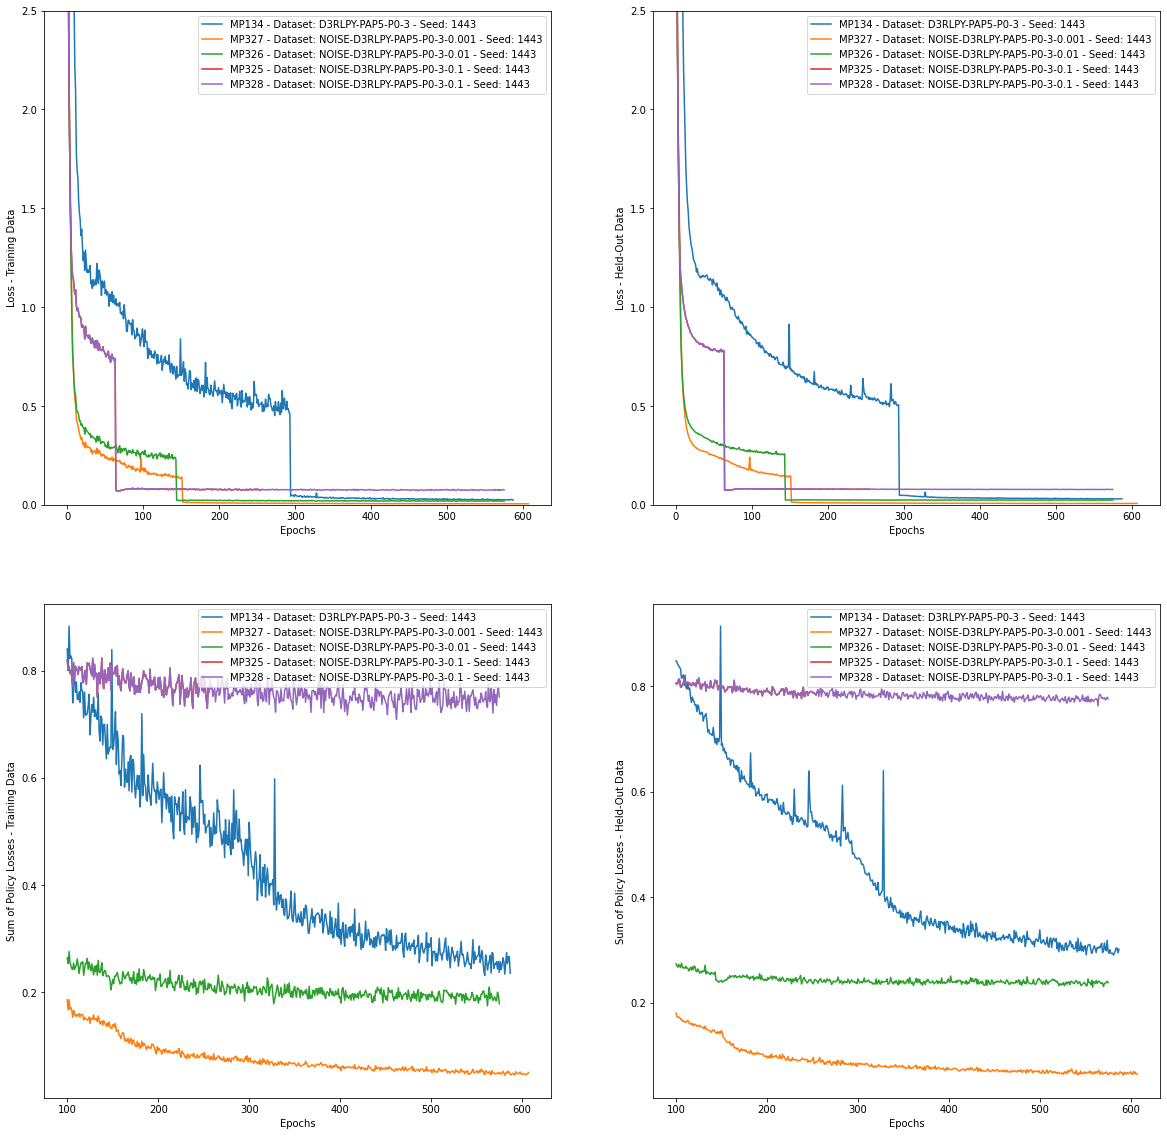

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP134,
    MP327,
    MP326,
    MP325,
    MP328,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[00:], label=f'{exp.name} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,2.5)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[00:], label=f'{exp.name} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    # ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    # ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

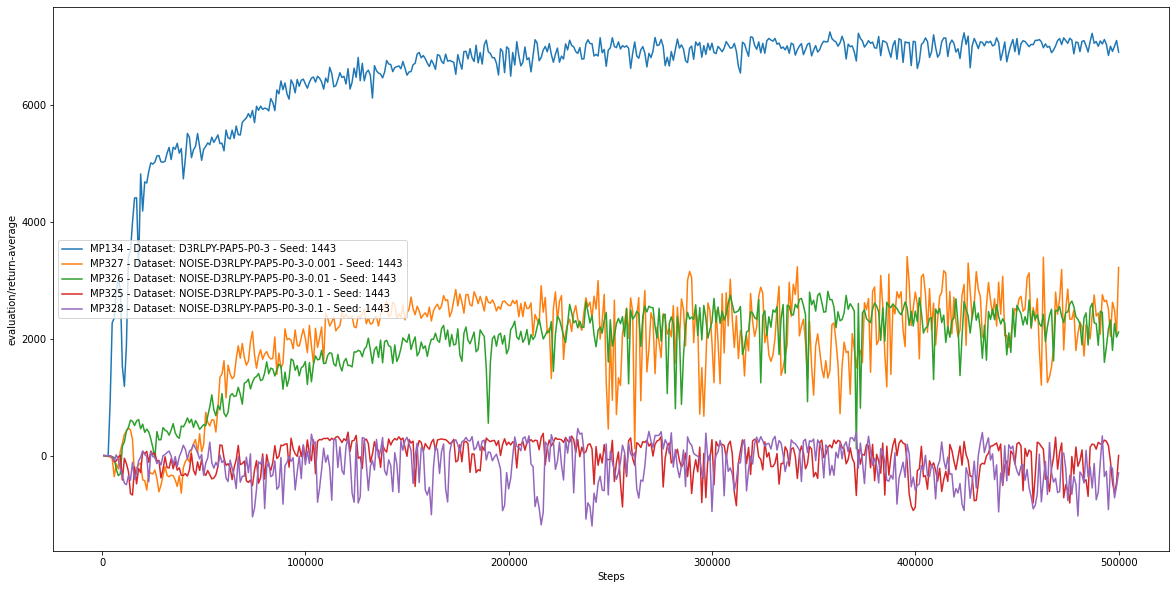

In [9]:
feature = 'evaluation/return-average'
fig, ax = plt.subplots(1, 1, figsize=(20,10))
for exp in [
    MP134,
    MP327,
    MP326,
    MP325,
    MP328,
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], label=f'{exp.name} - Dataset: {exp.dataset} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass